## High pr percentile and ROME - one model + obs

In [15]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


from os.path import expanduser
home = expanduser("~")

In [16]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]       

folder = home + '/Documents/data/cmip5/ds'
fileName = model + '_precip_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
precip = ds.precip*60*60*24
precip.attrs['units']= 'mm/day'

rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]

folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
rome = ds[rome_option]


percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
pr_percentile = ds[percentile_option]


obs = {'GPCP':True}
if obs['GPCP']:
    folder = home + '/Documents/data/obs/ds'
    fileName = 'GPCP_precip.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    precip_gpcp = ds.precip

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    rome_gpcp = ds[rome_option]

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    pr_percentile_gpcp = ds[percentile_option]

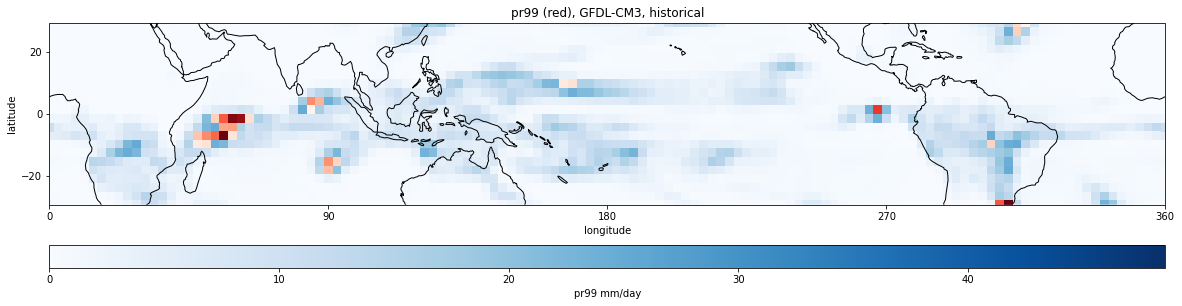

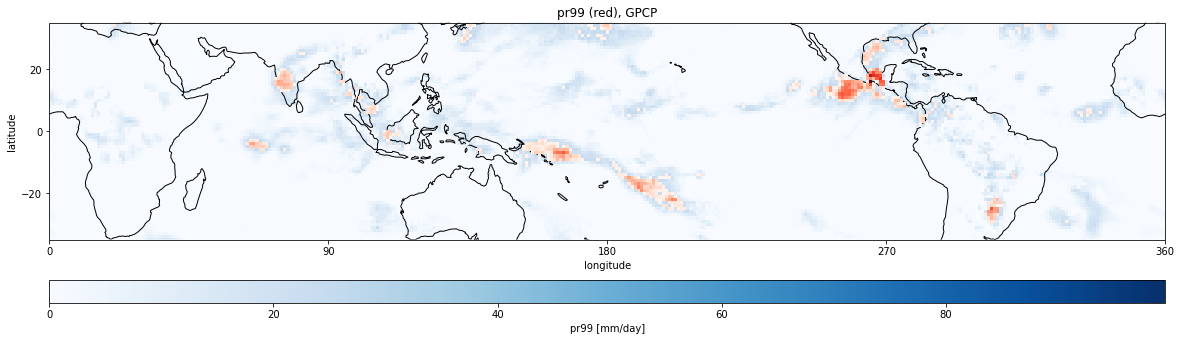

In [17]:
fig= plt.figure(figsize=(20,7.5))
lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeat.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

day = 0
pr_day = precip.isel(time=day)
extreme_percentileDay = pr_percentile.isel(time=day).data

pcm= ax.pcolormesh(lonm,latm, pr_day,transform=ccrs.PlateCarree(),zorder=0, cmap='Blues')
ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=ccrs.PlateCarree(), cmap='Reds')

ax.set_title(percentile_option + ' (red), ' + model + ', ' + experiment)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = percentile_option + ' ' + pr_percentile.attrs['units'])


if obs['GPCP']:
    fig= plt.figure(figsize=(20,7.5))
    lat = precip_gpcp.lat
    lon = precip_gpcp.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    day = 0
    pr_day = precip_gpcp.isel(time=day)
    extreme_percentileDay = pr_percentile.isel(time=day).data

    pcm= ax.pcolormesh(lonm,latm, pr_day,transform=ccrs.PlateCarree(),zorder=0, cmap='Blues')
    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=ccrs.PlateCarree(), cmap='Reds')

    ax.set_title(percentile_option + ' (red), GPCP')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = percentile_option + ' [' + pr_percentile.attrs['units'] + ']')

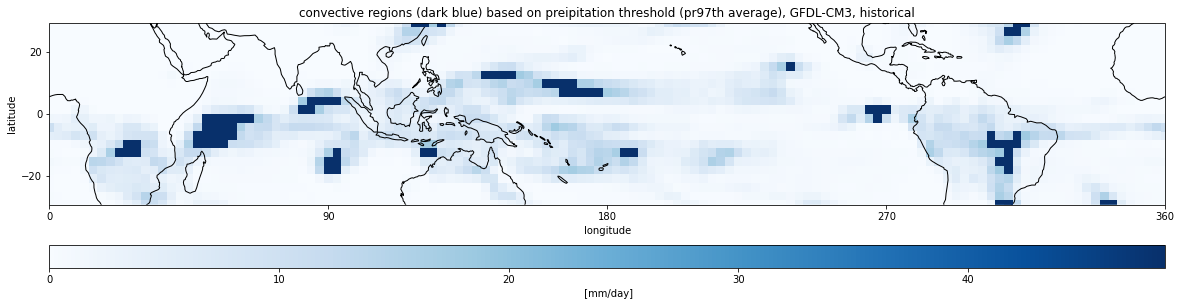

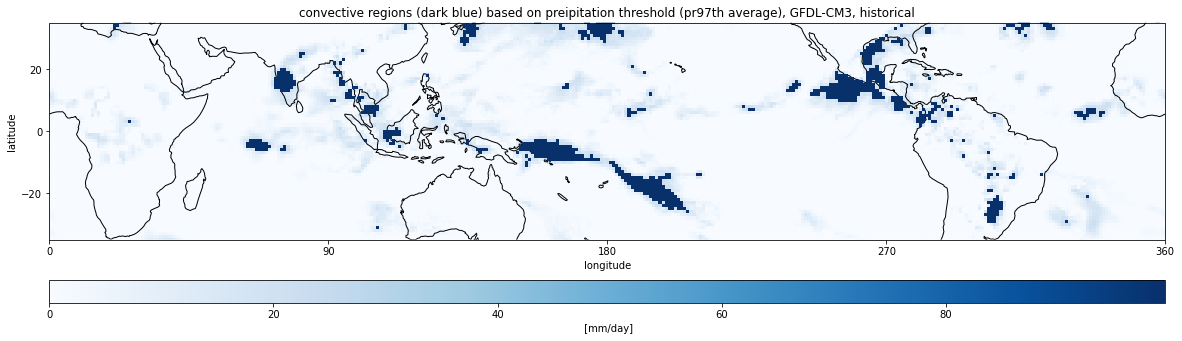

In [18]:
fig= plt.figure(figsize=(20,7.5))
lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeat.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

day = 0
pr_day = precip.isel(time=day)
conv_threshold = precip.quantile(0.97,dim=('lat','lon')).mean(dim='time')

L = skm.label(pr_day.where(pr_day>=conv_threshold,0)>0, background=np.nan,connectivity=2)
L = (L>0)*1
labelMatrix = xr.DataArray(
    data=L,
    dims=['lat', 'lon'],
    coords={'lat': pr_day.lat.data, 'lon': pr_day.lon.data}
    )

pcm= ax.pcolormesh(lonm,latm, pr_day,transform=ccrs.PlateCarree(),zorder=0, cmap='Blues')
ax.pcolormesh(lonm,latm, labelMatrix.where(labelMatrix>0),transform=ccrs.PlateCarree(),cmap='Blues_r')

ax.set_title('convective regions (dark blue) based on preipitation threshold (pr97th average), ' + model + ', ' + experiment)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = ' [mm/day]')


if obs['GPCP']:
    fig= plt.figure(figsize=(20,7.5))
    lat = precip_gpcp.lat
    lon = precip_gpcp.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    day = 0
    pr_day = precip_gpcp.isel(time=day)
    conv_threshold = precip_gpcp.quantile(0.97,dim=('lat','lon')).mean(dim='time')

    L = skm.label(pr_day.where(pr_day>=conv_threshold,0)>0, background=np.nan,connectivity=2)
    L = (L>0)*1
    labelMatrix = xr.DataArray(
        data=L,
        dims=['lat', 'lon'],
        coords={'lat': pr_day.lat.data, 'lon': pr_day.lon.data}
        )

    pcm= ax.pcolormesh(lonm,latm, pr_day,transform=ccrs.PlateCarree(),zorder=0, cmap='Blues')
    ax.pcolormesh(lonm,latm, labelMatrix.where(labelMatrix>0),transform=ccrs.PlateCarree(),cmap='Blues_r')

    ax.set_title('convective regions (dark blue) based on preipitation threshold (pr97th average), ' + model + ', ' + experiment)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = ' [mm/day]')

## annual

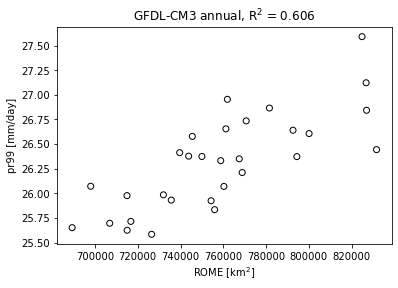

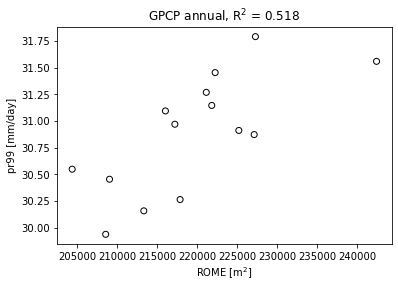

In [25]:
f, ax = plt.subplots()
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
x = ds[rome_option].resample(time='Y').mean(dim='time')

fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
y = ds[percentile_option].resample(time='Y').mean(dim='time')

res= stats.pearsonr(x,y)

plt.scatter(x,y,facecolors='none', edgecolor='k')
plt.ylabel(percentile_option + ' [mm/day]')
plt.xlabel('ROME [km$^2$]')

if res[1]<=0.05:
    plt.title(model + ' annual, R$^2$ = '+ str(round(res[0]**2,3)))
else:
    plt.title(model + ' annual')



if obs['GPCP']:
    f, ax = plt.subplots()

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    # x = ds[rome_option].resample(time='Y').mean(dim='time')
    # x = ds[rome_option].resample(time='Y').mean(dim='time').sel(time=slice('1996','2008'))
    x = ds[rome_option].resample(time='Y').mean(dim='time').sel(time=slice('2009','2022'))


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    # y = ds[percentile_option].resample(time='Y').mean(dim='time')
    # y = ds[percentile_option].resample(time='Y').mean(dim='time').sel(time=slice('1996','2008'))
    y = ds[percentile_option].resample(time='Y').mean(dim='time').sel(time=slice('2009','2022'))

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.ylabel(percentile_option + ' [mm/day]')
    plt.xlabel('ROME [m$^2$]')

    if res[1]<=0.05:
        plt.title('GPCP annual, R$^2$ = '+ str(round(res[0]**2,3)))
    else:
        plt.title('GPCP annual')



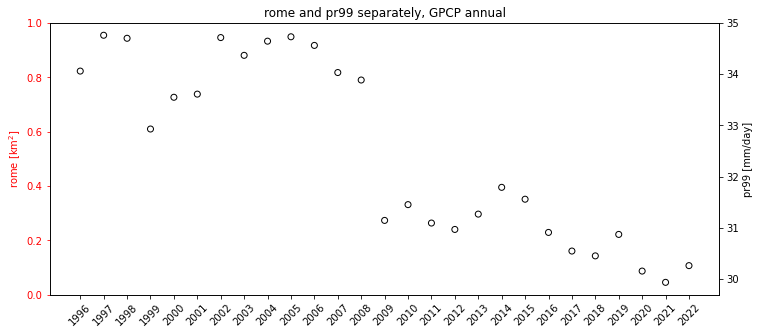

In [20]:
if obs['GPCP']:
    f, ax = plt.subplots(figsize=(12,5))

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='Y').mean(dim='time')


    # ax.scatter(np.arange(0,len(x)),x,facecolors='none', edgecolor='r')
    ax.set_ylabel(rome_option + ' [km$^2$]')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='red')

    years = x.time.dt.year.values
    plt.xticks(np.arange(0, len(years)), years, rotation=45)


    ax2 = ax.twinx()
    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option].resample(time='Y').mean(dim='time')

    ax2.scatter(np.arange(0,len(y)),y,facecolors='none', edgecolor='k')
    
    
    ax2.set_ylabel(percentile_option + ' [mm/day]')
    plt.title(rome_option + ' and ' + percentile_option + ' separately, GPCP annual')


# plt.ylabel(percentile_option + ' [mm/day]')
# plt.xlabel('ROME [m$^2$]')

## monthly

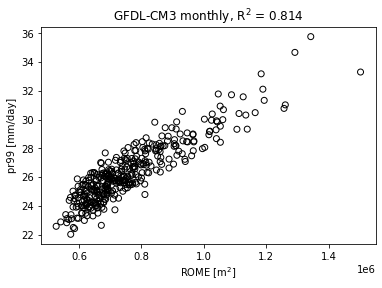

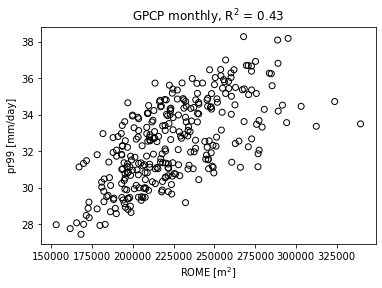

In [21]:
f, ax = plt.subplots()
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
x = ds[rome_option].resample(time='M').mean(dim='time')

fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
y = ds[percentile_option].resample(time='M').mean(dim='time')

res= stats.pearsonr(x,y)

plt.scatter(x,y,facecolors='none', edgecolor='k')
plt.ylabel(percentile_option + ' [mm/day]')
plt.xlabel('ROME [m$^2$]')

if res[1]<=0.05:
    plt.title(model + ' monthly, R$^2$ = '+ str(round(res[0]**2,3)))
else:
    plt.title(model + ' monthly')



if obs['GPCP']:
    f, ax = plt.subplots()

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='M').mean(dim='time')


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option].resample(time='M').mean(dim='time')

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.ylabel(percentile_option + ' [mm/day]')
    plt.xlabel('ROME [m$^2$]')

    if res[1]<=0.05:
        plt.title('GPCP monthly, R$^2$ = '+ str(round(res[0]**2,3)))
    else:
        plt.title('GPCP monthly')



## daily

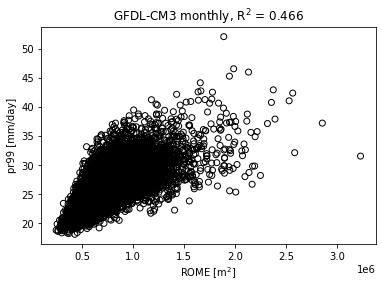

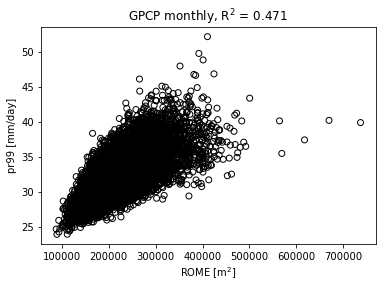

In [22]:
f, ax = plt.subplots()
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
x = ds[rome_option]

fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
y = ds[percentile_option]

res= stats.pearsonr(x,y)

plt.scatter(x,y,facecolors='none', edgecolor='k')
plt.ylabel(percentile_option + ' [mm/day]')
plt.xlabel('ROME [m$^2$]')

if res[1]<=0.05:
    plt.title(model + ' monthly, R$^2$ = '+ str(round(res[0]**2,3)))
else:
    plt.title(model + ' monthly')



if obs['GPCP']:
    f, ax = plt.subplots()

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option]


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[percentile_option]

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.ylabel(percentile_option + ' [mm/day]')
    plt.xlabel('ROME [m$^2$]')

    if res[1]<=0.05:
        plt.title('GPCP monthly, R$^2$ = '+ str(round(res[0]**2,3)))
    else:
        plt.title('GPCP monthly')



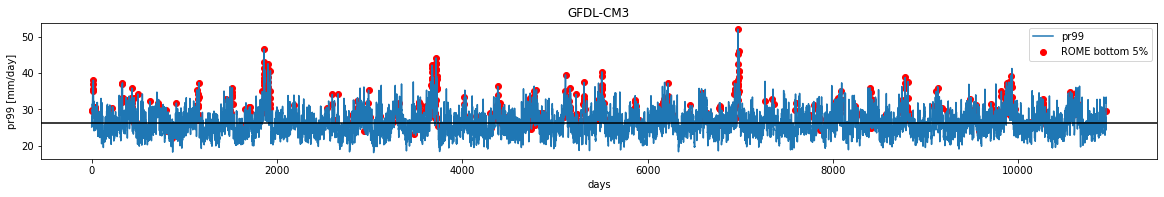

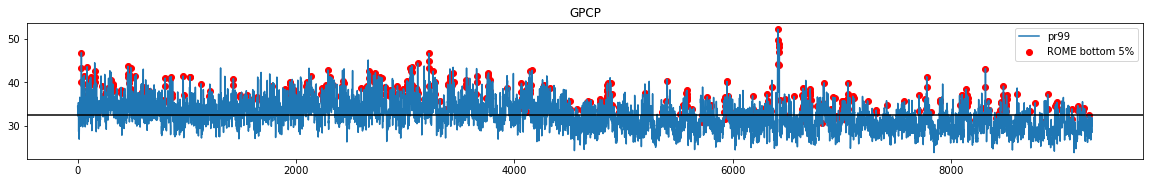

In [23]:
f, ax = plt.subplots(figsize=(20,2.5))
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

rome_prctile = np.percentile(ds[rome_option],95)
x2= np.argwhere(ds[rome_option].data>=rome_prctile)


fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

y = ds[percentile_option].data
x= np.arange(0,len(y),1)

ax.plot(x,y, label=percentile_option)
ax.scatter(x2,y[x2],label='ROME bottom 5%', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title(model)
ax.set_xlabel('days')
ax.set_ylabel(percentile_option + ' [mm/day]')
ax.legend()


if obs['GPCP']:
    f, ax = plt.subplots(figsize=(20,2.5))
    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    rome_prctile = np.percentile(ds[rome_option],95)
    x2= np.argwhere(ds[rome_option].data>=rome_prctile)


    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    y = ds[percentile_option].data
    x= np.arange(0,len(y),1)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME bottom 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title('GPCP')
    ax.legend()



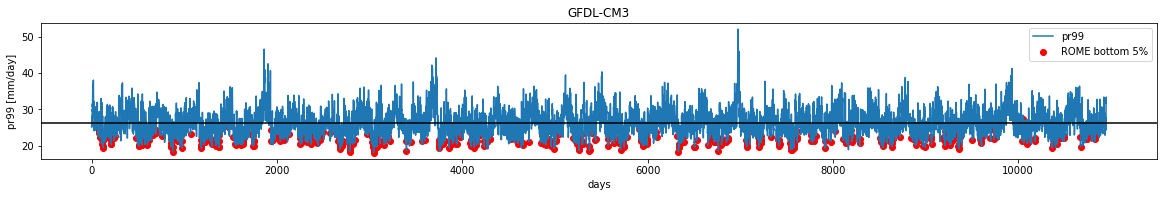

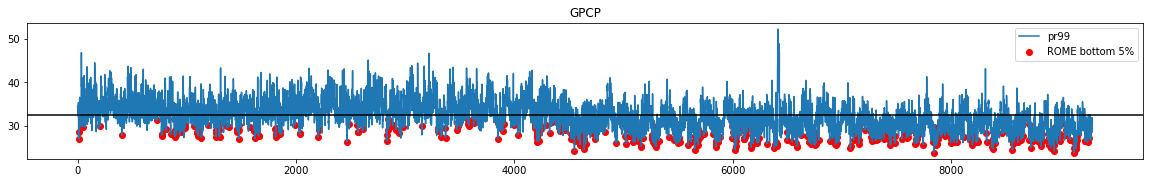

In [24]:
f, ax = plt.subplots(figsize=(20,2.5))
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

rome_prctile = np.percentile(ds[rome_option],5)
x2= np.argwhere(ds[rome_option].data<=rome_prctile)


fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

y = ds[percentile_option].data
x= np.arange(0,len(y),1)

ax.plot(x,y, label=percentile_option)
ax.scatter(x2,y[x2],label='ROME bottom 5%', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title(model)
ax.set_xlabel('days')
ax.set_ylabel(percentile_option + ' [mm/day]')
ax.legend()


if obs['GPCP']:
    f, ax = plt.subplots(figsize=(20,2.5))
    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    rome_prctile = np.percentile(ds[rome_option],5)
    x2= np.argwhere(ds[rome_option].data<=rome_prctile)


    fileName = 'GPCP_pr_percentiles.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)

    y = ds[percentile_option].data
    x= np.arange(0,len(y),1)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME bottom 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title('GPCP')
    ax.legend()

